1. 오늘의 날시 스크랩(네이버)
2. 날씨 본문 내용을 output.txt로 저장
3. 데이터 정제(클리닝)- 영문, 특수기호 등 제거(정규식)
4. 정제된 텍스트를 파일로 저장(output_cleaned.txt)
5. 정제된 파일을 읽어서 형태소 분석 -> 명사만 추출 -> 빈도수 조사
6. 단어별 빈도수를 .txt파일로 저장(output_final.txt)
7. 상위 10개 단어를 시각화 출력
8. Advanced
9. 협업필터링/ 감성분석/ 기계학습

In [48]:
import urllib.request as req
from bs4 import BeautifulSoup

URL="https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=103&sid2=248&oid=052&aid=0001276803"
OUTPUT_FILE_NAME="output.txt"

In [68]:
open_output_file=open(OUTPUT_FILE_NAME,'w')
res=get_text(URL)
#print(res)
open_output_file.write(res)
open_output_file.close()

In [67]:
def get_text(url):
    sourceFromURL=req.urlopen(url)
    soup=BeautifulSoup(sourceFromURL,'html.parser',from_encoding='utf-8') #from_encoding-> 한글 깨짐현상 방지
    #print(soup)
    text=""
    
    for item in soup.find_all("div", id="articleBodyContents"):
            text=text+str(item.find_all(text=True))
    return text

In [54]:
import re

INPUT_FILE_NAME="output.txt"
OUTPUT_FILE_NAME="output_cleaned.txt"
read_file=open(INPUT_FILE_NAME,'r')
write_file=open(OUTPUT_FILE_NAME,'w')
text=read_file.read()
print("before : ")
print(text)
cleaned_text=clean_text(text)
print("after : ")
print(cleaned_text)

write_file.write(cleaned_text)

read_file.close()
write_file.close()

before : 
['\n', ' 본문 내용 ', '\n', ' TV플레이어 ', '\n', '\n', '동영상 뉴스', '\n', '\n', '\n', ' // TV플레이어 ', '\n', '\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n', '\n\t\n\t날씨가 요즘만 같으면 참 좋겠다 싶습니다.', '파란 하늘 아래 미세먼지 걱정 없고 낮에는 따뜻한 봄 날씨를 느끼기 제격인데요.', '오늘 서울 아침 기온 7.6도로 다소 쌀쌀했지만, 한낮에는 17도까지 올라 일교차가 크게 벌어지겠습니다.', '바람이 약해졌던 서해안과 강원 영동, 경북 동해안에는 오늘 바람이 강하게 붑니다.', '건조한 날씨에 바람까지 강해 화재 위험이 높은 만큼 불씨 관리 철저히 해주셔야겠습니다.', '현재 전국 대부분 지방에 건조특보가 내려져 있습니다.', "산림청은 지난 목요일부터 산불 경보를 가장 높은 단계인 '심각' 단계로 격상해 발령 중입니다.", '논·밭두렁, 쓰레기 소각을 금지해주시고, 산림과 산림 근처에서도 불 사용을 금지해주시기 바랍니다.', '오늘 맑은 날씨 속에 한낮에는 따뜻하겠습니다.', '낮 기온, 서울 17도, 대전 18도, 광주와 대구 20도로 아침과 낮의 기온 차가 10도 이상 크게 벌어지겠습니다.', '내일과 모레 사이 전국에 비가 내리겠고요.', '비가 내리면서 장기간 이어졌던 건조함은 해소될 전망입니다.', '산불이 났던 강원도에는 최고 40밀리미터의 비가, 기온이 낮은 산간에는 10cm 이상의 많은 눈이 내리겠고요.', '제주 산간에 많은 곳은 120mm 이상의 폭우가 예상됩니다.', '비와 눈으로 인한 피해 없도록 주변 점검 철저히 해주시기 바랍니다.', '지금까지 YTN 유다현입니다.', ' ▶ 대한민국 24시간 뉴스 채널 YTN 생방송보기 ', ' ▶ 네이버에서 YTN 뉴스 채널 구독하기 ', '[저작권자(c) YTN & YTN PLUS 무단전재 및 재배포 금지]\n\t'

In [69]:
def clean_text(myText):
    cleaned_text=re.sub('[a-zA-Z\{\}\[\]\(\)\/_▶&\\\.\'\"]','',myText) #\\\-> 역슬래시 기호 생략
    return cleaned_text

konlpy 설치과정
1. anaconda prompt
=> python -m pip install --upgrade pip
=> Java 설치(java.oracle.com)
=> JAVA_HOME 환경설정
내 pc->마우스 우클릭 -> 속성 -> 고급시스템설정 -> 환경변수 ->시스템변수 ->새로만들기
변수이름 : JAVA_HOME / 변수 값 : C:\Program Files\Java\jdk-12
시스템 변수 -> PATH 더블클릭 -> 새로만들기 -> %JAVA_HOME%\bin
=>자바테스트
cmd -> java 나오는지 확인하기
=> JPype 다운로드



In [12]:
from konlpy.tag import Twitter
tw=Twitter()

C:\Users\B-17\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [18]:
ma=tw.pos("아버지가방에들어가신다")
print(ma)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


In [22]:
tw.pos(u"이것도 되나욬ㅋㅋㅎㅎ되넿",norm=True, stem=True)
#print(ma)

[('이', 'Determiner'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('되다', 'Verb'),
 ('ㅋㅋㅎㅎ', 'KoreanParticle'),
 ('되넿', 'Noun')]

In [30]:
from collections import Counter
colors=['r','b','r','r','g','g','g','r']
cnt=Counter(colors)
print(cnt)
print(cnt.most_common())


Counter({'r': 4, 'g': 3, 'b': 1})
[('r', 4), ('g', 3), ('b', 1)]


In [98]:
def get_tags(gtext, ntags=20):
    twitter=Twitter()
    nouns=twitter.nouns(gtext) #명사만 추출
    #print(nouns)
    cnt=Counter(nouns)
    #print(cnt)
    #print(cnt.most_common(ntags)) #상위 ntags만 추출됨.
    ret_list=[]
    for word,cnt in cnt.most_common(ntags):
        #print(word,cnt)
        temp={'tag':word,'count':cnt}
        ret_list.append(temp)
    #print(ret_list)
    return ret_list

In [99]:
text_file_name="output_cleaned.txt"
output_file_name="output_final.txt"
noun_count=10 #추출하는 명사단어의 개수 10로 한정

open_text_file=open(text_file_name,'r')
readText=open_text_file.read()

res=get_tags(readText,noun_count)


open_output_file=open(output_file_name,'w')

#print(res)
for data in res:
    noun=data['tag']
    cnt=data['count']
    open_output_file.write("{} {}\n".format(noun,cnt))


C:\Users\B-17\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [139]:
from matplotlib import pyplot as plt
import matplotlib
f=open("output_final.txt",'r')
news_word=[]
word_cnt=[]


i=1
while True: #줄의 마지막까지 읽게됨.
    line=f.readline()
    word,cnt=line.split(" ")
    news_word.append(word)
    word_cnt.append(int(cnt))
    
    if i==10: break
    i+=1

f.close()
print(news_word)
print(word_cnt)


['날씨', '기온', '도', '비', '뉴스', '낮', '오늘', '바람', '금지', '이상']
[4, 4, 4, 4, 3, 3, 3, 3, 3, 3]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


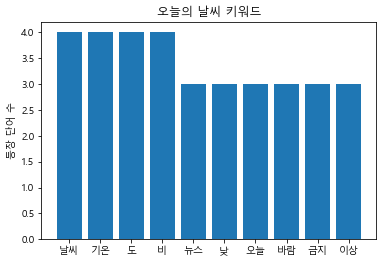

In [150]:
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

xs=[i for i, _ in enumerate(news_word)] #_ -> "enumerate된 단어는 안쓰겠다."
print(xs)
plt.bar(xs,word_cnt)
plt.ylabel('등장 단어 수')
plt.title('오늘의 날씨 키워드')
plt.xticks([i for i, _ in enumerate(news_word)],news_word)
plt.show()